Zadanie 8.	Skrypt wizualizujący dane z punktu 7.

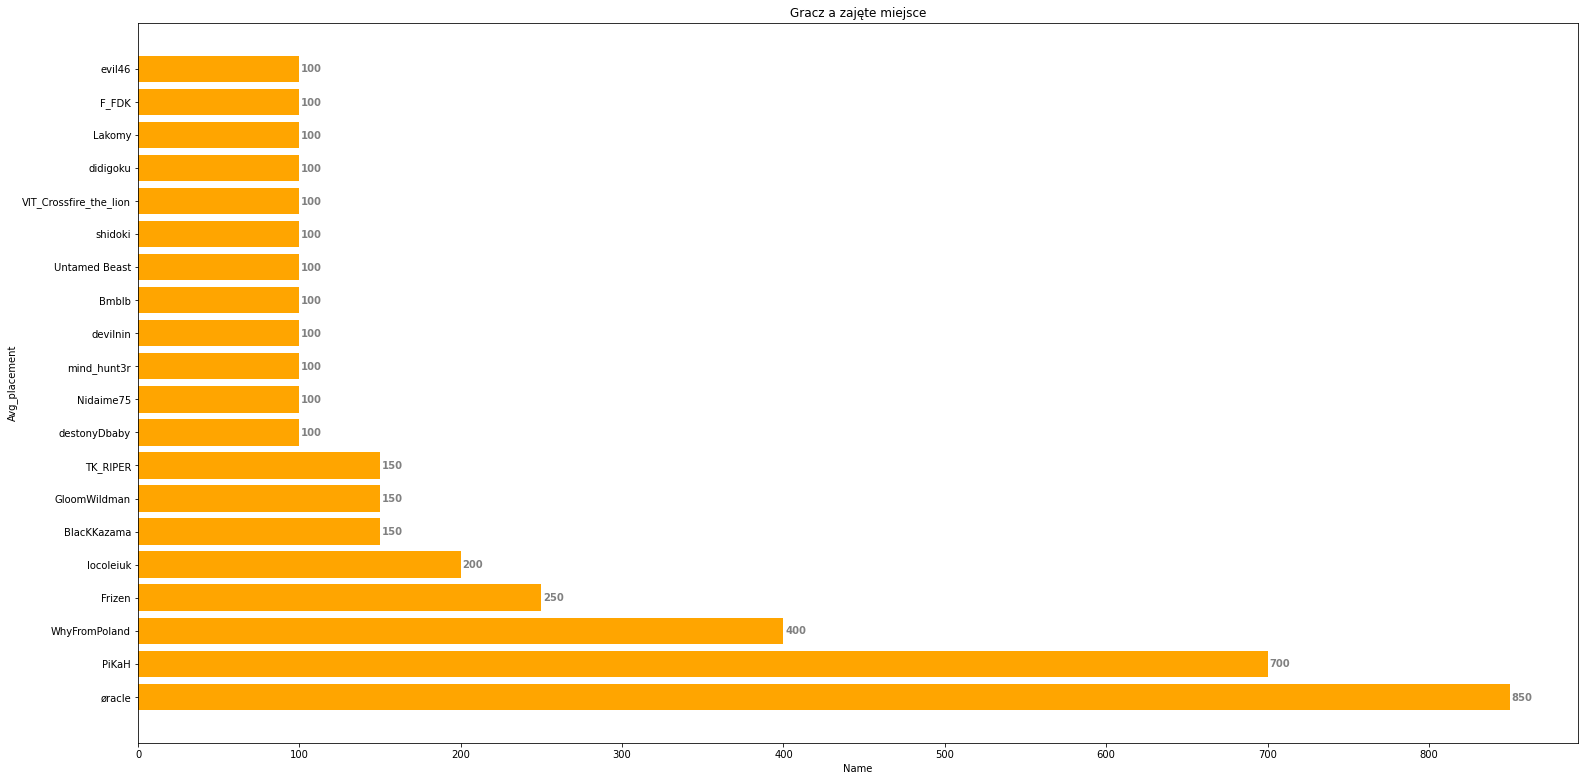

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_pp = pd.read_csv('player_points.csv', sep=';')
df_tnm = pd.read_csv('turnieje_na_miesiac.csv', sep=';')
df_pp.head()

fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([2,2,2,2])
ax.barh(df_pp['name'] , df_pp['points'], color ='orange')

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+1, i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
plt.title("Gracz a zajęte miejsce")
plt.ylabel("Avg_placement")
plt.xlabel("Name")
plt.show()

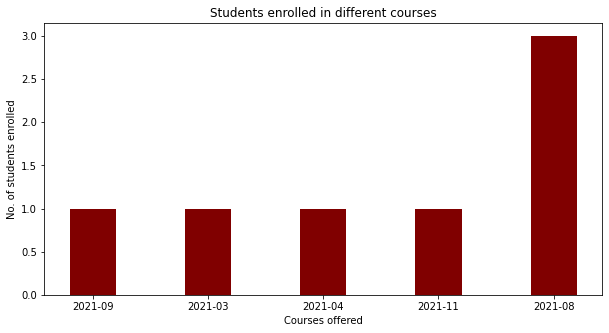

In [13]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(df_tnm['Date'], df_tnm['Num_of_tournaments'], color ='maroon',
        width = 0.4)
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()

5.Skrypty wykorzystujące regresję do prognozowania przyszłych wartości

In [43]:
from sklearn.linear_model import LinearRegression , ElasticNet;
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

df = pd.read_csv('player_matches.csv', sep=';')
df.head()


X = df[['rank','tournament_winrate', 'points', 'rank_2' , 'tournament_winrate_2' , 'points_2' ]];
Y = df['wynik']; 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Dane testowe
print(X_test)
#Linear regression
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, y_train)  # perform linear regression
Y_pred = linear_regressor.predict(X_test)  # make predictions
#Wynik 1 dla danych testowych
print(Y_pred)

#Lasso
model = Lasso(alpha=1.0)
model.fit(X_train , y_train)
Y_pred_2 = model.predict(X_test)
#Wynik 2 dla danych testowych
print(Y_pred_2)                      


#Elastic net
model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
model2.fit(X_train , y_train)
Y_pred_3 = model.predict(X_test)
#Wynik 3 dla danych testowych
print(Y_pred_3) 


    rank  tournament_winrate  points  rank_2  tournament_winrate_2  points_2
36     5                0.66     100       4                  0.66       100
16     5                0.60      60       4                  0.50        20
4      5                0.60     100       5                  0.77       150
9      5                0.77     150       3                  0.60        40
45     5                0.88     200       5                  0.66       100
40     5                0.88     200       5                  0.66        40
61     5                0.71     150       4                  0.50         0
5      5                0.77     150       3                  0.60        40
64     5                0.71     150       5                  0.66       100
12     5                0.77     150       5                  0.60       100
25     5                0.66     150       5                  1.00       200
59     5                0.66      40       4                  0.71        60

4.Skrypty testujące hipotezy

In [41]:
mean_median = df.agg(['mean' , 'median'])
print(mean_median)

#Współczynnik skośności rozkładu
print('\n Współczynnik skośności rozkładu')
skew = df.skew()
print(skew)

print('\n Kurtoza')
#kurtoza - spłąszczanie rozkłądu
kurtoza = df.kurtosis().abs().sort_values()
print(kurtoza)


        rank  tournament_winrate  ...   points_2     wynik
mean     5.0            0.718806  ...  78.507463  0.746269
median   5.0            0.660000  ...  60.000000  1.000000

[2 rows x 7 columns]

 Współczynnik skośności rozkładu
rank                    0.000000
tournament_winrate      0.787160
points                 -0.183218
rank_2                 -0.780571
tournament_winrate_2   -0.739297
points_2                0.485239
wynik                  -1.157978
dtype: float64

 Kurtoza
rank                    0.000000
tournament_winrate      0.086053
rank_2                  0.516165
tournament_winrate_2    0.584591
wynik                   0.680308
points_2                1.207357
points                  1.301152
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWar

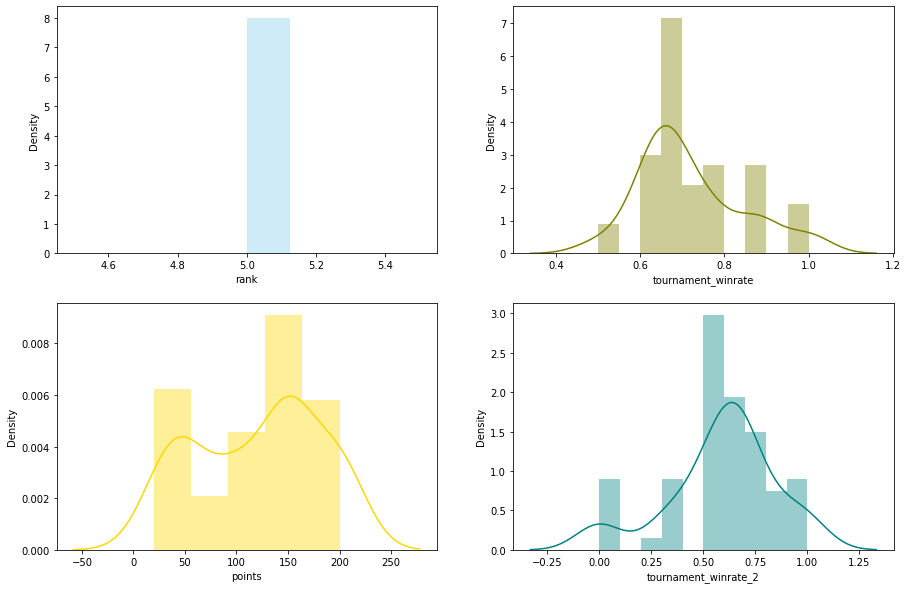

In [44]:
#Wizualizacja 4 wybrane kolumny
f, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.distplot(df['rank'], color='skyblue', ax=axes[0, 0])
sns.distplot(df['tournament_winrate'], color='olive', ax=axes[0, 1])
sns.distplot(df['points'], color='gold', ax=axes[1, 0])
sns.distplot(df['tournament_winrate_2'], color='teal', ax=axes[1, 1])
plt.show()